In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, ValidationCurveDisplay

from src.graficos import plot_residuos


In [5]:
df = pd.read_csv("../dados/dados_regularizacao.csv")

df.head()

,X,y
0,0.031998,6.112445
1,-0.112421,-8.107160
2,-0.140900,-3.848340
3,-0.061807,-0.999919
4,-0.076337,-5.174541


In [7]:
fig = px.scatter(df, x='X', y='y')

fig.show()

In [8]:
regressor_lr = LinearRegression()

X = df[['X']]
y = df['y']

regressor_lr.fit(X, y)

LinearRegression()

In [9]:
regressor_lr.coef_

array([67.96860913])

In [10]:
regressor_lr.intercept_

0.33871148651030003

In [12]:
regressor_lr.score(X, y)

0.784432686808289

In [13]:
y_pred_lr = regressor_lr.predict(X)

In [15]:
fig = px.scatter(df, x='X', y='y')
fig.add_scatter(x=df['X'], y=y_pred_lr, mode='lines')
fig.show()

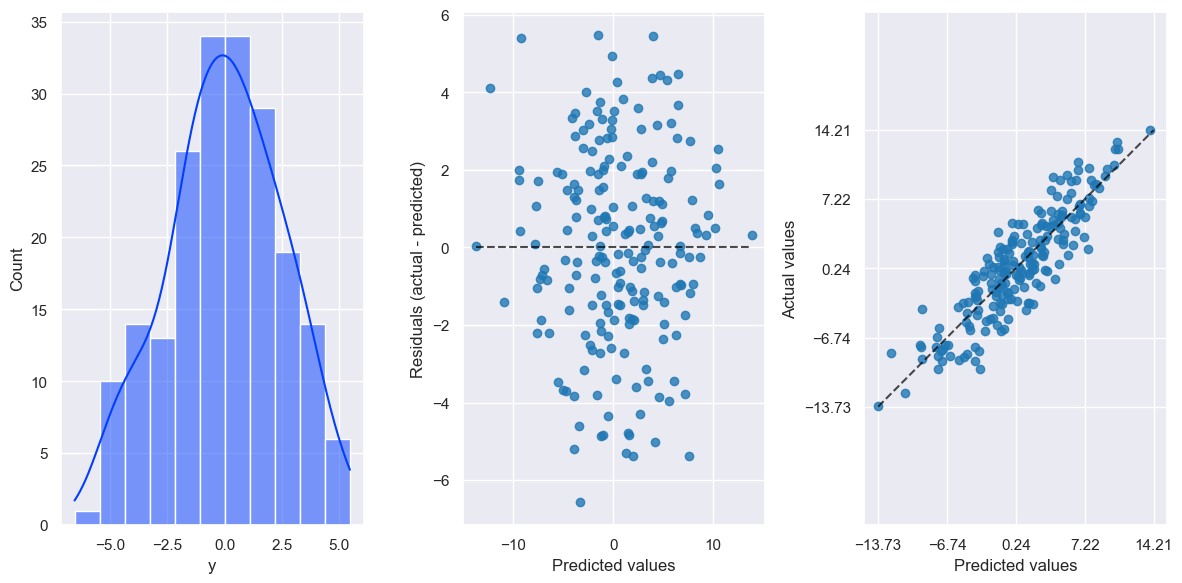

In [16]:
plot_residuos(y, y_pred_lr)

Separando em treino e teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
regressor_lr.coef_

array([67.60768091])

In [21]:
regressor_lr.intercept_

0.18275356368716378

In [22]:
regressor_lr.score(X_train, y_train)

0.7751062479896125

In [23]:
regressor_lr.score(X_test, y_test)

0.8118994576604706

In [24]:
y_pred_lr_split = regressor_lr.predict(X)

In [26]:
fig = px.scatter(df, x='X', y='y', color_discrete_sequence=['blue'])
fig.add_scatter(x=X_test['X'], y=y_test, mode='markers', marker=dict(color='red'))
fig.add_scatter(x=df['X'], y=y_pred_lr_split, mode='lines', line=dict(color='green'))
fig.add_scatter(x=df['X'], y=y_pred_lr, mode='lines', line=dict(color='orange'))
fig.show()


## Ridge

In [28]:
alfas = [0, 1E-2, 5E-2, 1E-1, 0.25, 0.5, 1, 5, 10, 100]

y_pred_ridge = []

scores_ridge = []

coefs_ridge = []

for alfa in alfas:
    regressor_ridge = Ridge(alpha=alfa)
    regressor_ridge.fit(X_train, y_train)
    coefs_ridge.append({'alfa': alfa, 'coef': regressor_ridge.coef_, 'intercept': regressor_ridge.intercept_})
    scores_ridge.append((regressor_ridge.score(X_test, y_test)))
    y_pred_ridge.append(regressor_ridge.predict(X=X))




In [29]:
scores_ridge

[0.8118994576604706,
 0.8113654524125822,
 0.8070578344475577,
 0.7979111600769365,
 0.7570811666212846,
 0.6780452104172208,
 0.5441253419869017,
 0.19700913562120137,
 0.1081442439154836,
 0.010299073550334992]

In [30]:
coefs_ridge

[{'alfa': 0, 'coef': array([67.60768091]), 'intercept': 0.18275356368716406},
 {'alfa': 0.01,
  'coef': array([66.73985577]),
  'intercept': 0.18674938208991138},
 {'alfa': 0.05,
  'coef': array([63.48046609]),
  'intercept': 0.20175693218881707},
 {'alfa': 0.1, 'coef': array([59.82816384]), 'intercept': 0.2185736108383174},
 {'alfa': 0.25, 'coef': array([51.02167878]), 'intercept': 0.259122234487834},
 {'alfa': 0.5, 'coef': array([40.97050103]), 'intercept': 0.3054019273201445},
 {'alfa': 1, 'coef': array([29.39068016]), 'intercept': 0.35872011216597743},
 {'alfa': 5, 'coef': array([9.01249376]), 'intercept': 0.45254953505094364},
 {'alfa': 10, 'coef': array([4.82805036]), 'intercept': 0.4718164070842232},
 {'alfa': 100, 'coef': array([0.515967]), 'intercept': 0.4916709851899412}]

In [32]:
fig = px.scatter(df, x='X', y='y', color_discrete_sequence=['blue'])
fig.add_scatter(x=X_test['X'], y=y_test, mode='markers', marker=dict(color='red'))
fig.add_scatter(x=df['X'], y=y_pred_lr_split, mode='lines', line=dict(color='green'))
fig.add_scatter(x=df['X'], y=y_pred_lr, mode='lines', line=dict(color='orange'))

for alfa, y_pred in zip(alfas, y_pred_ridge):
    fig.add_scatter(x=df['X'], y=y_pred, mode='lines', name=f'Ridge alpha={alfa}')

fig.show()

Ferramentas para descobrir a melhor alpha

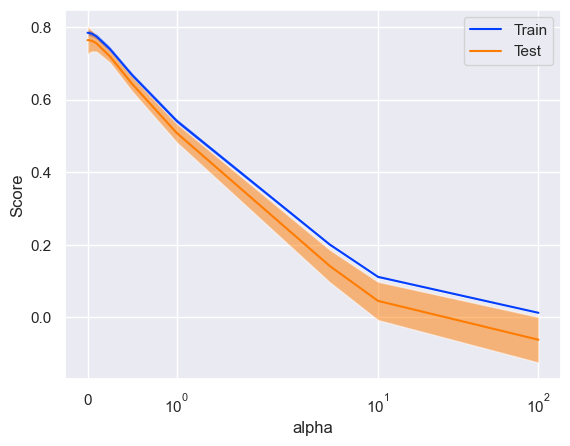

In [33]:
fig, ax = plt.subplots()

display_val_curve = ValidationCurveDisplay.from_estimator(
    Ridge(), X, y, param_name="alpha", param_range=alfas, cv=5, ax=ax
)
plt.show()

## Lasso